# Pymaceuticals Inc.
---

### Analysis

- The Capomulin regimen has very similar results to the Ramicane regimen, both resulting in less tumor development compared to the Infubinol and Ceftamine regimens as shown in the box plots
  
- The line plot for mouse ID l509 showed us that it took about 20 days before noticing regression in tumor volume from the Capomulin regimen
  
- A future graph that may help is another line plot showing tumor volume vs timepoint for the average of all mice that took the Capomulin regimen, which will show how long it typically takes for regression to start
  
- The scatter plots showed a clear correlation between tumor volume and weight of mice, meaning each drug regimen was less effective on mice that weighed more
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice.
mice_count = pymaceuticals_df["Mouse ID"].nunique()
mice_count

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pymaceuticals_df[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_miceID = duplicate_mice["Mouse ID"].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = pymaceuticals_df[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pymaceuticals_df.loc[pymaceuticals_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()
clean_count = pymaceuticals_df["Mouse ID"].unique()
print(clean_df["Mouse ID"].nunique())

248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pymaceuticals_summary_df = pymaceuticals_df.sort_values(['Tumor Volume (mm3)'],ascending=True)
grouped_df = pymaceuticals_summary_df.groupby('Drug Regimen')

mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
var = grouped_df['Tumor Volume (mm3)'].var()
std = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume':mean,
                            'Median Tumor Voulume':median,
                            'Tumor Volume Variance':var,
                            'Tumor Volume Std. Dev':std,
                            'Tumor Volume Std. Err.':sem})
summary_df

,Mean Tumor Volume,Median Tumor Voulume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
regimen_df = pymaceuticals_df.groupby("Drug Regimen")
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = regimen_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

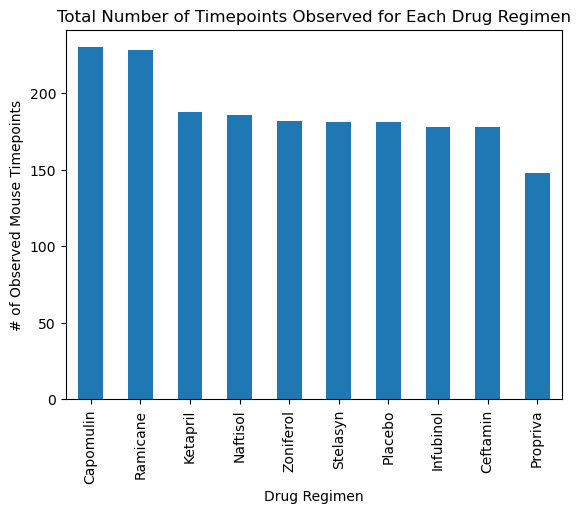

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar")

plt.title("Total Number of Timepoints Observed for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

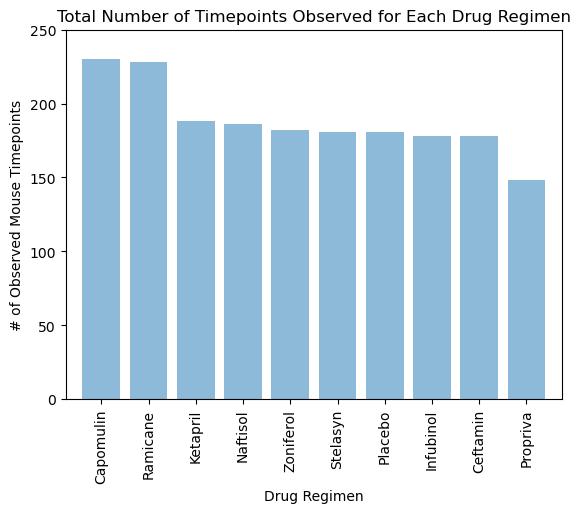

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_totals = [230,228,188,186,182,181,181,178,178,148]
drug_names = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
x_axis = np.arange(len(drug_totals))

plt.bar(x_axis, drug_totals, alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 250)

plt.title("Total Number of Timepoints Observed for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

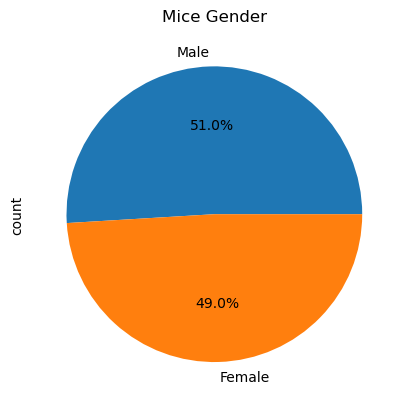

In [20]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_df = clean_df["Sex"].value_counts()


# Make the pie chart
gender_df.plot(kind="pie", autopct="%1.1f%%")
plt.title("Mice Gender")
plt.show()

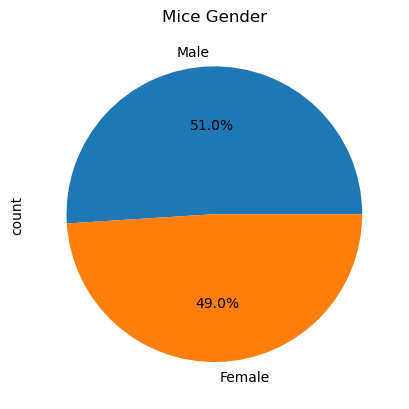

In [21]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
y = np.array(["51.0", "49.0"])
labels = ["Male", "Female"]
plt.ylabel("count")
# Make the pie chart
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.title("Mice Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
last_timepoint = merged_df[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
last_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = last_timepoint.loc[last_timepoint["Drug Regimen"]==drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol.append(drug_data)

    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_drug = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug} potential outliers: {outlier_drug} ")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


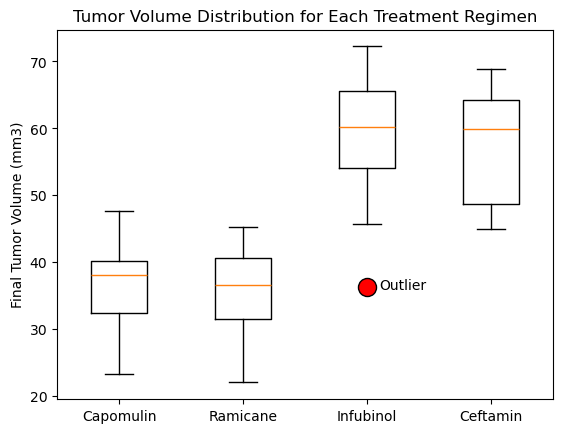

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
outlier = dict(marker="o", markerfacecolor="red", markersize=13)
plt.boxplot(tumor_vol, labels=treatment_regimens, flierprops=outlier)
plt.text(3.1, 36, "Outlier")
plt.title("Tumor Volume Distribution for Each Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

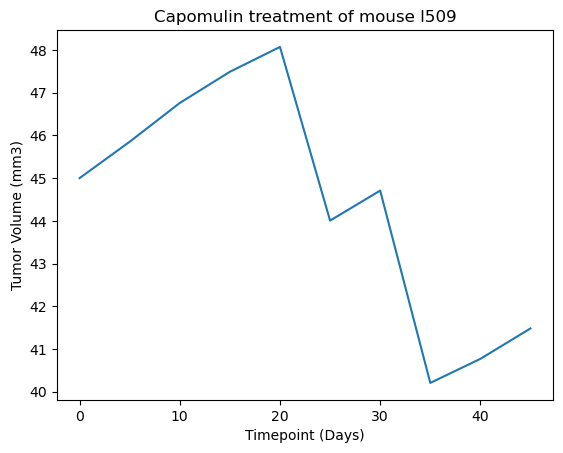

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = clean_df.loc[(clean_df["Mouse ID"]=="l509") & (clean_df["Drug Regimen"]=="Capomulin")]
plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.show()

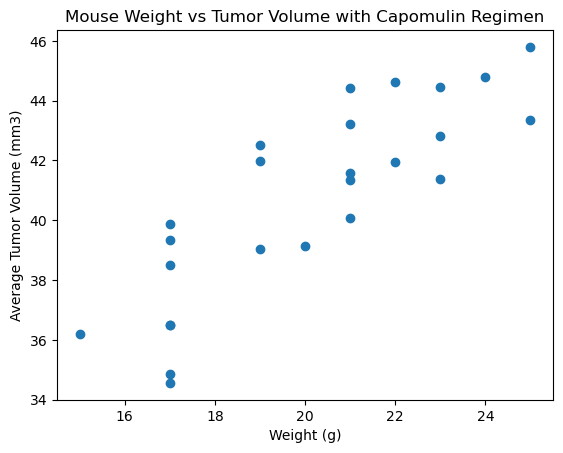

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"]=="Capomulin"]
tumor_vol = capomulin_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
tumor_vol
plt.scatter(tumor_vol["Weight (g)"], tumor_vol["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Tumor Volume with Capomulin Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721 


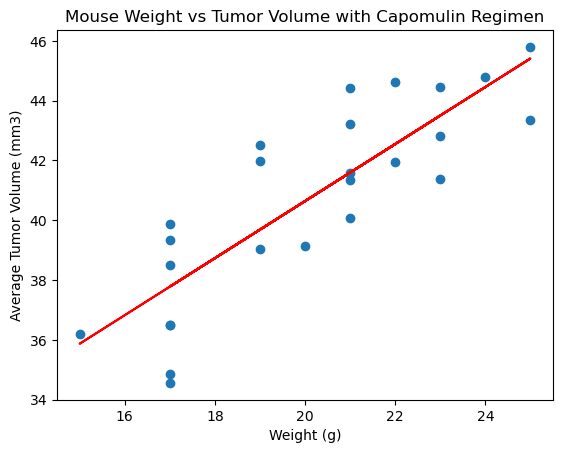

In [27]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, p_value = st.pearsonr(tumor_vol["Weight (g)"], tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient} ")

slope, intercept, r_value, p_value, std_err = st.linregress(tumor_vol["Weight (g)"], tumor_vol["Tumor Volume (mm3)"])
regress_values = tumor_vol["Weight (g)"] * slope + intercept
plt.scatter(tumor_vol["Weight (g)"], tumor_vol["Tumor Volume (mm3)"])
plt.plot(tumor_vol["Weight (g)"], regress_values, color="red")
plt.title("Mouse Weight vs Tumor Volume with Capomulin Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()